In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [6]:
ops.reset_default_graph()
with tf.Session() as sess:
    lr = 0.05
    bs = 25
    
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    model_output = tf.add(tf.matmul(x_data, A), b)
    loss = tf.reduce_mean(tf.square(y_target - model_output))
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    loss_vec = []
    for i in range(100):
        rand_index = np.random.choice(len(x_vals), size=bs)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        if (i + 1) % 25 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)

Step #25 A = [[2.267248]] b = [[2.7823403]]
Loss = 1.5971261
Step #50 A = [[1.6159061]] b = [[3.5959425]]
Loss = 0.8675736
Step #75 A = [[1.3057702]] b = [[4.0966983]]
Loss = 0.4772024
Step #100 A = [[1.1845787]] b = [[4.391143]]
Loss = 0.17634195


In [7]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

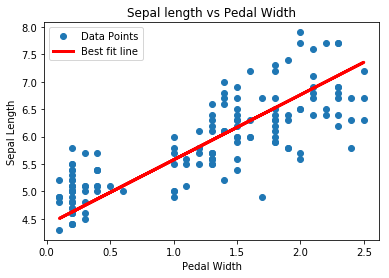

In [8]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

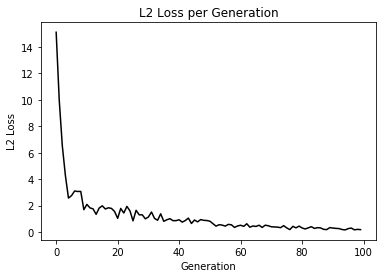

In [9]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()